<a href="https://colab.research.google.com/github/tomritmanmeer/Inrange-Golf-Shot-Data-Project/blob/main/Inrange_Golf_Shot_Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Inrange Golf Shot Data Project
### Tom Ritman-Meer using Google Colaboratory
Analysis of my golf shot data from the Inrange radar technology at Tonbridge Golf Centre

I hit a number of golf shots on the practice range at Tonbridge Golf Centre with each of my driver, 3 wood, 4 iron, 7 iron and 56 degree sand wedge. The Inrange technology tracks a range of variables by radar and stores them on a database, allowing the data for each session to be downloaded in .csv format. In this project I have imported this data using Pandas, cleaned and processed it into a useable form and then carried out some visualisation and analysis using the Matplotlib and Seaborn libraries, to see where potential improvements may be achieved.


Club details:
* Driver - Titleist TS3 - 10.5 degree loft
* 3 Wood - Titleist TS3 - 16.5 degree
* 4 Iron - Taylormade P770
* 7 Iron - Taylormade P770
* SW - 56 degree Callaway MD5 wedge

In [1]:
# shot data uploaded to google drive - allow access to drive to import data to Pandas
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
iron_data = pd.read_csv('gdrive/My Drive/Golf Shot Data Project/golf_shot_data.csv')
wood_data = pd.read_csv('gdrive/My Drive/Golf Shot Data Project/shot_data_d_3w.csv')

In [4]:
# shot data obtained during multiple practice sessions so need to concatenate the data into a single dataframe
frames = [iron_data, wood_data]
data = pd.concat(frames)

In [5]:
data.head()

,Club,Strokes Gained,Carry Dist. Range (yd),Carry Dist. Premium (yd),Total Dist. Range (yd),Total Dist. Premium (yd),Apex (ft),Ball Speed (mph),Launch Direction,Launch Angle (deg),From Centre (yd),Curve,Prox to Hole (yd),Target (yd)
0,SW,0.82,89.0,90.0,91.0,92.0,79,74,1°R,42°,1R,1L,1,87
1,SW,0.17,92.0,93.0,93.0,95.0,85,85,3°L,41°,5L,0,7,87
2,SW,0.13,91.0,92.0,92.0,94.0,82,76,4°L,40°,6L,1L,7,87
3,SW,0.37,91.0,93.0,94.0,95.0,79,76,2°L,40°,0,1R,3,87
4,SW,0.12,83.0,84.0,86.0,87.0,66,70,3°R,40°,5R,0,8,87


In [6]:
data.tail()

,Club,Strokes Gained,Carry Dist. Range (yd),Carry Dist. Premium (yd),Total Dist. Range (yd),Total Dist. Premium (yd),Apex (ft),Ball Speed (mph),Launch Direction,Launch Angle (deg),From Centre (yd),Curve,Prox to Hole (yd),Target (yd)
82,D,-0.09,206.692857,222.003439,222.003439,236.220408,75,141,5°R,14°,38R,6R,--,--
83,D,0.04,222.003439,238.407634,249.343764,265.747959,56,150,2°L,7°,37L,8L,--,--
84,D,0.23,224.190665,240.594860,259.186281,275.590476,52,147,1°L,9°,27L,5L,--,--
85,D,0.28,219.816213,236.220408,251.530990,267.935185,43,152,2°L,6°,18L,2L,--,--
86,D,0.15,213.254535,228.565117,224.190665,239.501247,89,150,2°R,10°,21R,4R,--,--


In [7]:
data.columns

Index(['Club', 'Strokes Gained', 'Carry Dist. Range (yd)',
       'Carry Dist. Premium (yd)', 'Total Dist. Range (yd)',
       'Total Dist. Premium (yd)', 'Apex (ft)', 'Ball Speed (mph)',
       'Launch Direction', 'Launch Angle (deg)', 'From Centre (yd)', 'Curve',
       'Prox to Hole (yd)', 'Target (yd)'],
      dtype='object')

The data contains an array of variables, described below.
* Club - Indicates the golf club used for the shot.
* Strokes Gained - A measure of the quality of the shot, positive values being an improvement on the expected par score.
* Carry Distance Range - Total distance through the air measured for the range ball hit - measured in yards.
* Carry Distance Premium - Total distance through the air calculated for a premium golf ball - measured in yards.
* Total Distance Range - Total distance including roll out measured for the range ball hit - measured in yards.
* Total Distance Premium - Total distance including roll out calculated for a premium golf ball - measured in yards.
* Apex - Measured maximum height of the shot hit - measured in yards.
* Ball Speed - Measured ball speed of the range ball hit -  measured in miles per hour.
* Launch Direction - Angle of the initial ball velocity relative to the target line - measured in degrees
* Launch Angle - Angle of the initial ball velocity relative to the horizontal axis - measured in degrees
* From Centre - Displacement of the final ball position from the target line - measured in yards
* Curve - Displacement of ball relative to the initial velocity vector - measured in yards
* Proximity to Hole - Distance from the target of final ball position - measured in yards
* Target - Total distance of target from initial ball position - measured in yards

In [8]:
# selecting the most relevant columns for study from the dataframe
data = data[['Club','Strokes Gained','Total Dist. Premium (yd)', 'Apex (ft)', 'Ball Speed (mph)','Launch Angle (deg)', 'From Centre (yd)', 'Curve','Prox to Hole (yd)', 'Target (yd)']]

As can be seen above, the data contains a number of letters and symbols, which need to be removed before the numerical data can be analysed. The code below removes the degree symbols from the angle data and the L and R values from the directional data. Shots which travel left of the target are given negative values and shots to the right given positive values.

In [ ]:
data['Launch Angle (deg)'] = data['Launch Angle (deg)'].str.replace('°','')
data['From Centre (yd)'] = data['From Centre (yd)'].apply(lambda x: "-"+x if 'L' in x else x)
data['From Centre (yd)'] = data['From Centre (yd)'].str.replace('R','')
data['From Centre (yd)'] = data['From Centre (yd)'].str.replace('L','')
data['Curve'] = data['Curve'].apply(lambda x: "-"+x if 'L' in x else x)
data['Curve'] = data['Curve'].str.replace('R','')
data['Curve'] = data['Curve'].str.replace('L','')

In [10]:
data.head()

,Club,Strokes Gained,Total Dist. Premium (yd),Apex (ft),Ball Speed (mph),Launch Angle (deg),From Centre (yd),Curve,Prox to Hole (yd),Target (yd)
0,SW,0.82,92.0,79,74,42,1,-1,1,87
1,SW,0.17,95.0,85,85,41,-5,0,7,87
2,SW,0.13,94.0,82,76,40,-6,-1,7,87
3,SW,0.37,95.0,79,76,40,0,1,3,87
4,SW,0.12,87.0,66,70,40,5,0,8,87


It can be seen that the data is now clean and ready for analysis. It is simplest in this case to define a specific dataframe for analysis of the shot data for each club. Since some of the columns were converted to string format during the cleaning process, they are now converted back into numerical float format.

In [11]:
data_sw = data[data['Club'] == "SW"].drop('Club', axis=1).astype(float)
data_7i = data[data['Club'] == "7i"].drop('Club', axis=1).astype(float)
data_4i = data[data['Club'] == "4i"].drop('Club', axis=1).astype(float)
data_3w = data[data['Club'] == "3W"].drop(['Club', 'Prox to Hole (yd)', 'Target (yd)'], axis=1).astype(float)
data_d = data[data['Club'] == "D"].drop(['Club', 'Prox to Hole (yd)', 'Target (yd)'], axis=1).astype(float)

Below we can see heatmaps of the correlation data between each variable for the 7 iron and driver shots. As expected, there are strong correlations between the total distance and the ball speed, apex and launch angle, distance from centre and curve.

<Axes: >

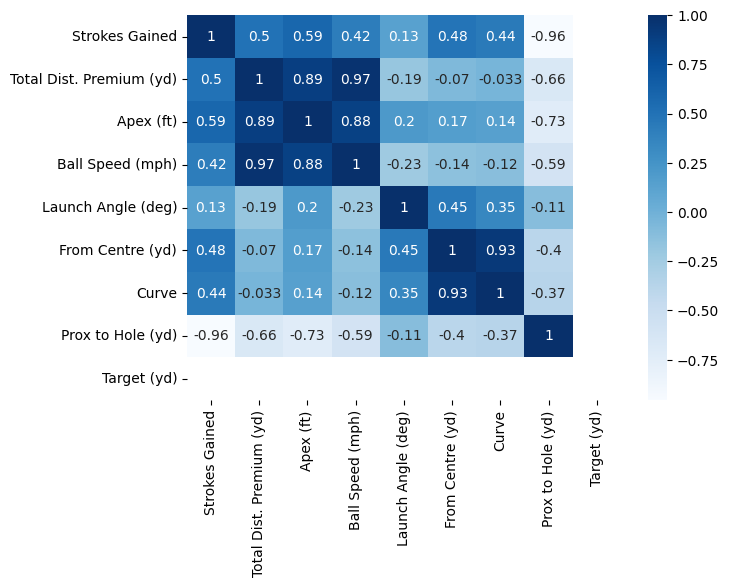

In [12]:
plt.figure(figsize=(7,5))
sns.heatmap(data_7i.corr(),annot=True,cmap='Blues')

<Axes: >

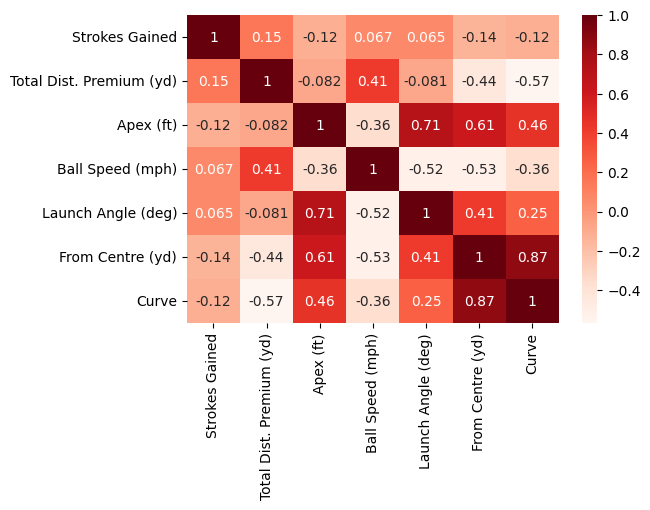

In [13]:
plt.figure(figsize=(6,4))
sns.heatmap(data_d.corr(),annot=True,cmap='Reds')

We can now plot scatter graphs using matplotlib, showing the final ball positions relative to the target for the iron shots. A circular putting green with a radius of approximately 15 yards has been added to each plot artificially to indicate accuracy.

Text(0.5, 1.0, '56 Degree Sand Wedge Shot Distribution Around Target')

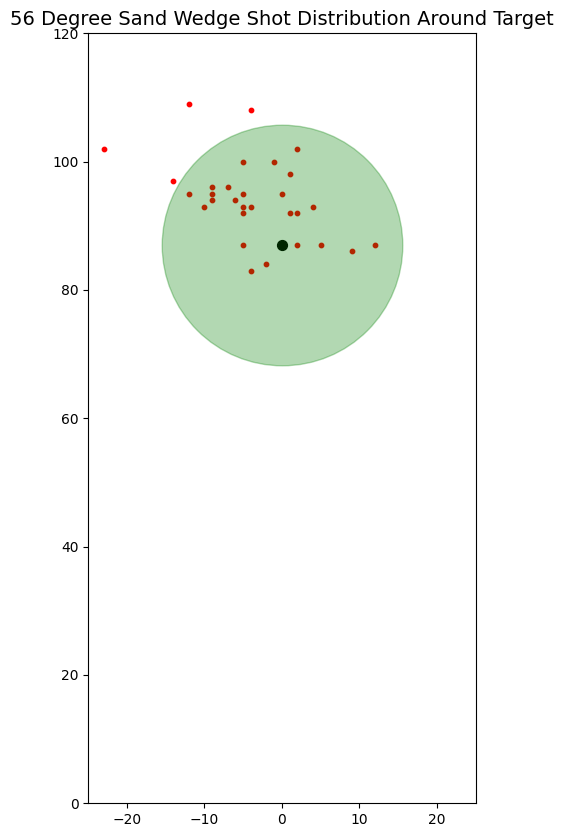

In [14]:
plt.figure(figsize=(5,10))
plt.scatter(data_sw['From Centre (yd)'], data_sw['Total Dist. Premium (yd)'], color='Red', s=10)
plt.scatter(0,data_sw['Target (yd)'].iloc[0], color='Black', s=50)
plt.scatter(0,87, marker = "o", s = 30000, alpha = 0.3, color="Green")
plt.xlim([-25, 25])
plt.ylim([0, 120])
plt.title("56 Degree Sand Wedge Shot Distribution Around Target", size=14)

Text(0.5, 1.0, '7 Iron Shot Distribution Around Target')

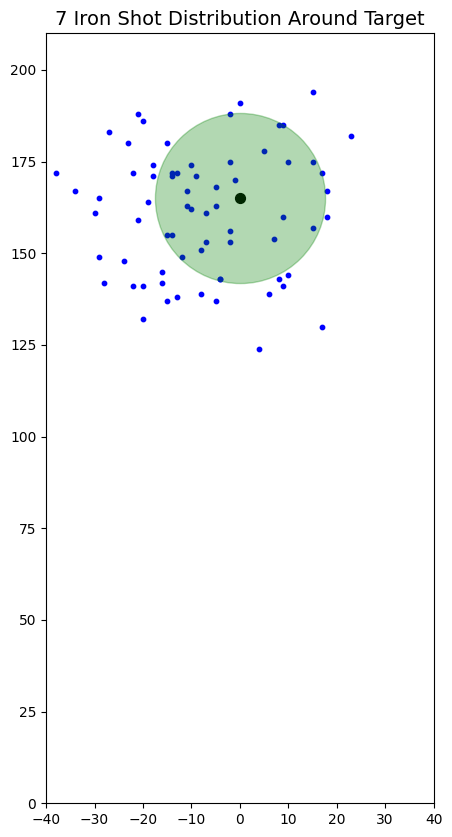

In [15]:
plt.figure(figsize=(5,10))
plt.scatter(data_7i['From Centre (yd)'], data_7i['Total Dist. Premium (yd)'], color='Blue', s=10)
plt.scatter(0,data_7i['Target (yd)'].iloc[0], color='Black', s=50)
plt.scatter(0,165, marker = "o", s = 15000, alpha = 0.3, color="Green")
plt.xlim([-40, 40])
plt.ylim([0, 210])
plt.title("7 Iron Shot Distribution Around Target", size=14)

Text(0.5, 1.0, '4 Iron Shot Distribution Around Target')

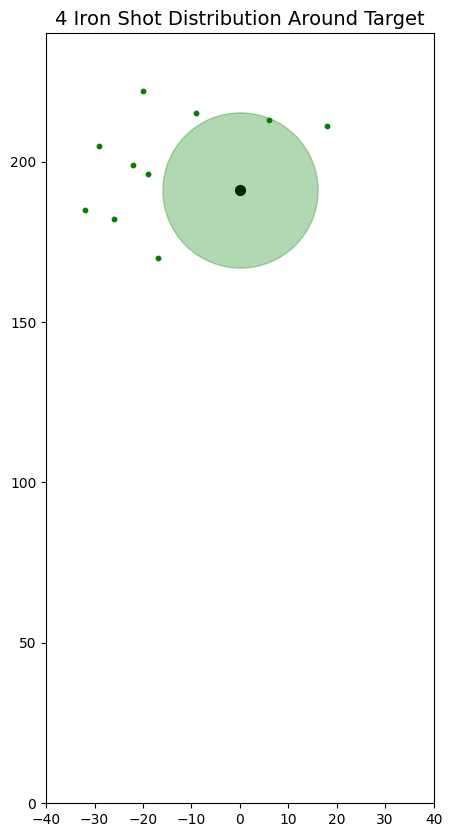

In [16]:
plt.figure(figsize=(5,10))
plt.scatter(data_4i['From Centre (yd)'], data_4i['Total Dist. Premium (yd)'], color='Green', s=10)
plt.scatter(0,data_4i['Target (yd)'].iloc[0], color='Black', s=50)
plt.scatter(0,191, marker = "o", s = 12500, alpha = 0.3, color="Green")
plt.xlim([-40, 40])
plt.ylim([0, 240])
plt.title("4 Iron Shot Distribution Around Target", size=14)

The data shows my proximity to the target was much lower with the sand wedge, as would be expected over a shorter distance. Almost all of the wedge shots ended up on the green, while the 4 iron and 7 iron shots show a tendency to be pulled to the left, which is representative of my usual miss.

Next we will look at the tee shot distribution for the driver and 3 wood clubs.

Text(0.5, 1.0, 'Driver & 3 Wood Tee Shot Distribution')

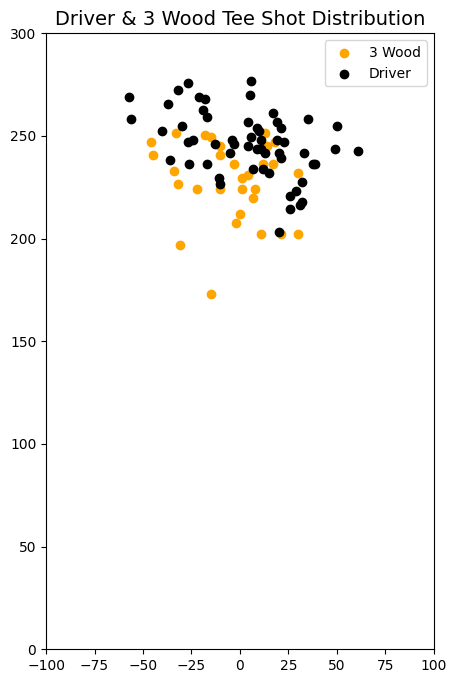

In [17]:
plt.figure(figsize=(5,8))
plt.scatter(data_3w['From Centre (yd)'], data_3w['Total Dist. Premium (yd)'], color='Orange', label = '3 Wood')
plt.scatter(data_d['From Centre (yd)'], data_d['Total Dist. Premium (yd)'], color='Black', label = 'Driver')
plt.xlim([-100, 100])
plt.ylim([0, 300])
plt.legend()
plt.title("Driver & 3 Wood Tee Shot Distribution", size=14)

This is quite a good dispersion, with the majority of the shots either in or just outside the boundary of a fairway 50 yards wide and centred at 0 from centre. It is noteable that the dispersion in the distance of the 3 wood shots from the target line is not noticeably better than that for driver. This implies that the distance given up by hitting 3 wood rather than driver off the tee may not be compensated for in terms of improved accuracy.

Mean distances for all clubs and proximity to the hole for the iron shots are shown below.

In [18]:
print("SW Mean Distance:         "+str(data_sw['Total Dist. Premium (yd)'].mean().round(1))+" yards\n"
      "7 Iron Mean Distance:     "+str(data_7i['Total Dist. Premium (yd)'].mean().round(1))+" yards\n"
      "4 Iron Mean Distance:     "+str(data_4i['Total Dist. Premium (yd)'].mean().round(1))+" yards\n"
      "3 Wood Mean Distance:     "+str(data_3w['Total Dist. Premium (yd)'].mean().round(1))+" yards\n"
      "Driver Mean Distance:     "+str(data_d['Total Dist. Premium (yd)'].mean().round(1))+" yards")

SW Mean Distance:         94.2 yards
7 Iron Mean Distance:     161.8 yards
4 Iron Mean Distance:     199.8 yards
3 Wood Mean Distance:     228.1 yards
Driver Mean Distance:     245.9 yards


In [19]:
print("SW Mean Proximity to Hole:         "+str(data_sw['Prox to Hole (yd)'].mean().round(1))+" yards\n"
      "7 Iron Mean Proximity to Hole:     "+str(data_7i['Prox to Hole (yd)'].mean().round(1))+" yards\n"
      "4 Iron Mean Proximity to Hole:     "+str(data_4i['Prox to Hole (yd)'].mean().round(1))+" yards")

SW Mean Proximity to Hole:         9.2 yards
7 Iron Mean Proximity to Hole:     28.3 yards
4 Iron Mean Proximity to Hole:     35.4 yards


Histograms are shown below created using the Seaborn library, depicting the distribution of the distance from centre of fairway for both the 3 wood and driver tee shots. It can be seen that the standard deviation in this value is only 5.6 yards greater with the driver than with the 3 wood. This implies that it is almost always better to hit driver off the tee on long holes, due to the considerable expected extra distance. The only exception to this would be when accuracy is critical, for example when there are trees or water in play, increasing the risk of a lost ball.

Text(0.5, 0.98, 'Distribution of Distance from Centre of Fairway for 3 Wood & Driver')

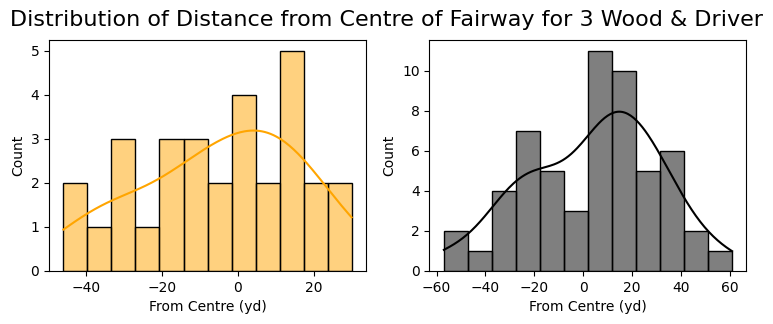

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(9, 3))
sns.histplot(x='From Centre (yd)',data=data_3w, bins=12,kde=True, color='Orange', ax=ax[0])
sns.histplot(x='From Centre (yd)',data=data_d ,bins=12,kde=True, color='Black', ax=ax[1])
fig.suptitle('Distribution of Distance from Centre of Fairway for 3 Wood & Driver', fontsize=16)

In [21]:
print("3 Wood Standard Deviation from Centre of Fairway: "+str(data_3w['From Centre (yd)'].std().round(1))+" yards\n"
      "Driver Standard Deviation from Centre of Fairway: "+str(data_d['From Centre (yd)'].std().round(1))+" yards")

3 Wood Standard Deviation from Centre of Fairway: 21.1 yards
Driver Standard Deviation from Centre of Fairway: 26.7 yards


Histograms are shown below, indicating the distributions of ball speed, total distance and apex for all clubs, also created using Seaborn.

Text(0.5, 0.98, 'Distribution of Ball Speed, Total Distance and Apex for 56 Degree Sand Wedge')

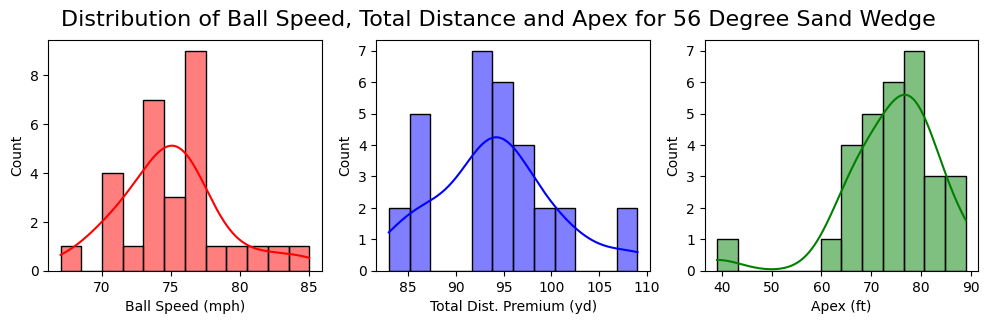

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))
sns.histplot(x='Ball Speed (mph)',data=data_sw,bins=12,kde=True, color='Red', ax=ax[0])
sns.histplot(x='Total Dist. Premium (yd)',data=data_sw,bins=12,kde=True, color='Blue', ax=ax[1])
sns.histplot(x='Apex (ft)',data=data_sw,bins=12,kde=True, color='Green', ax=ax[2])
fig.suptitle('Distribution of Ball Speed, Total Distance and Apex for 56 Degree Sand Wedge', fontsize=16)

Text(0.5, 0.98, 'Distribution of Ball Speed, Total Distance and Apex for 7 Iron')

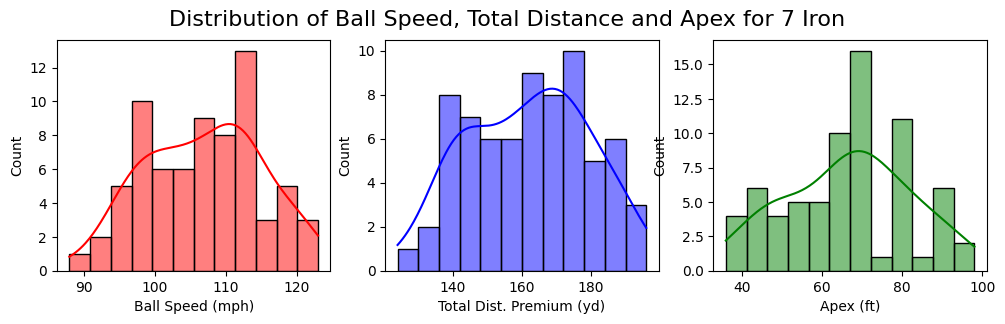

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))
sns.histplot(x='Ball Speed (mph)',data=data_7i,bins=12,kde=True, color='Red', ax=ax[0])
sns.histplot(x='Total Dist. Premium (yd)',data=data_7i,bins=12,kde=True, color='Blue', ax=ax[1])
sns.histplot(x='Apex (ft)',data=data_7i,bins=12,kde=True, color='Green', ax=ax[2])
fig.suptitle('Distribution of Ball Speed, Total Distance and Apex for 7 Iron', fontsize=16)

Text(0.5, 0.98, 'Distribution of Ball Speed, Total Distance and Apex for 4 Iron')

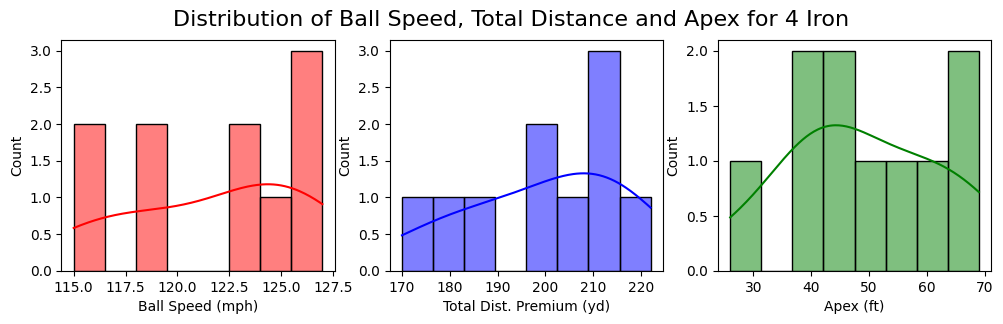

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))
sns.histplot(x='Ball Speed (mph)',data=data_4i,bins=8,kde=True, color='Red', ax=ax[0])
sns.histplot(x='Total Dist. Premium (yd)',data=data_4i,bins=8,kde=True, color='Blue', ax=ax[1])
sns.histplot(x='Apex (ft)',data=data_4i,bins=8,kde=True, color='Green', ax=ax[2])
fig.suptitle('Distribution of Ball Speed, Total Distance and Apex for 4 Iron', fontsize=16)

Text(0.5, 0.98, 'Distribution of Ball Speed, Total Distance and Apex for 3 Wood')

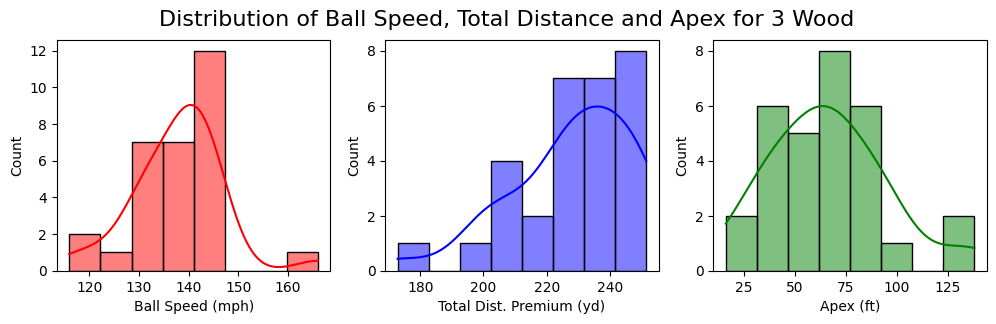

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))
sns.histplot(x='Ball Speed (mph)',data=data_3w,bins=8,kde=True, color='Red', ax=ax[0])
sns.histplot(x='Total Dist. Premium (yd)',data=data_3w,bins=8,kde=True, color='Blue', ax=ax[1])
sns.histplot(x='Apex (ft)',data=data_3w,bins=8,kde=True, color='Green', ax=ax[2])
fig.suptitle('Distribution of Ball Speed, Total Distance and Apex for 3 Wood', fontsize=16)

Text(0.5, 0.98, 'Distribution of Ball Speed, Total Distance and Apex for Driver')

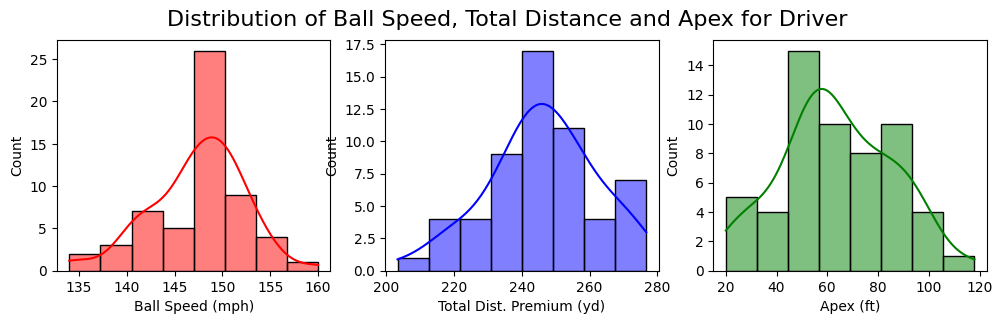

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))
sns.histplot(x='Ball Speed (mph)',data=data_d,bins=8,kde=True, color='Red', ax=ax[0])
sns.histplot(x='Total Dist. Premium (yd)',data=data_d,bins=8,kde=True, color='Blue', ax=ax[1])
sns.histplot(x='Apex (ft)',data=data_d,bins=8,kde=True, color='Green', ax=ax[2])
fig.suptitle('Distribution of Ball Speed, Total Distance and Apex for Driver', fontsize=16)

Boxplots are shown below, indicating the distribution of the proximity to target data for each iron club, the distribution in the initial ball speed for all clubs and the distribution in total distance including roll out for all clubs.

Text(0.5, 0.98, 'Boxplots Showing Proximity to Target Distribution for the Iron Data')

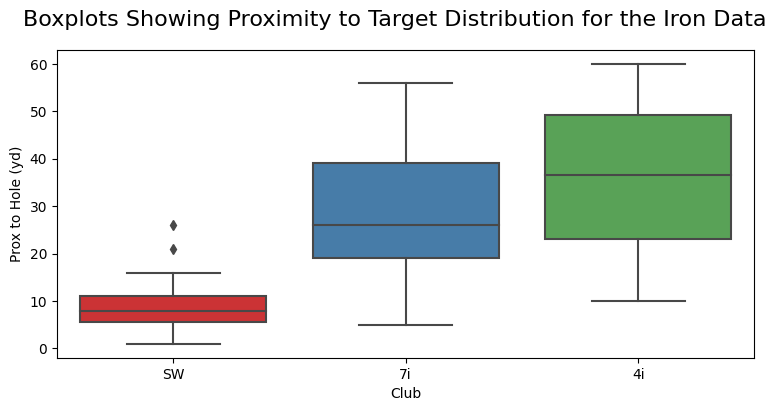

In [27]:
plt.figure(figsize=(9,4))
sns.boxplot(x='Club',y='Prox to Hole (yd)', data=iron_data, palette='Set1')
plt.suptitle('Boxplots Showing Proximity to Target Distribution for the Iron Data', fontsize=16)

Text(0.5, 0.98, 'Boxplots Showing Ball Speed Distribution for Each Club')

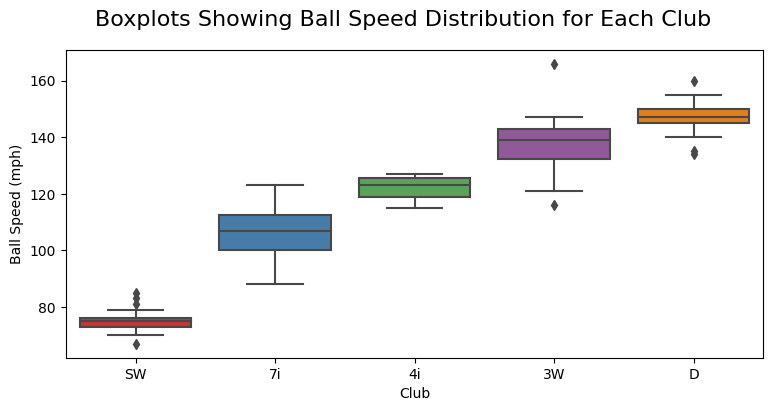

In [28]:
plt.figure(figsize=(9,4))
sns.boxplot(x='Club',y='Ball Speed (mph)',data=data,palette='Set1')
plt.suptitle('Boxplots Showing Ball Speed Distribution for Each Club', fontsize=16)

Text(0.5, 0.98, 'Boxplots Showing Total Distance Distribution for Each Club')

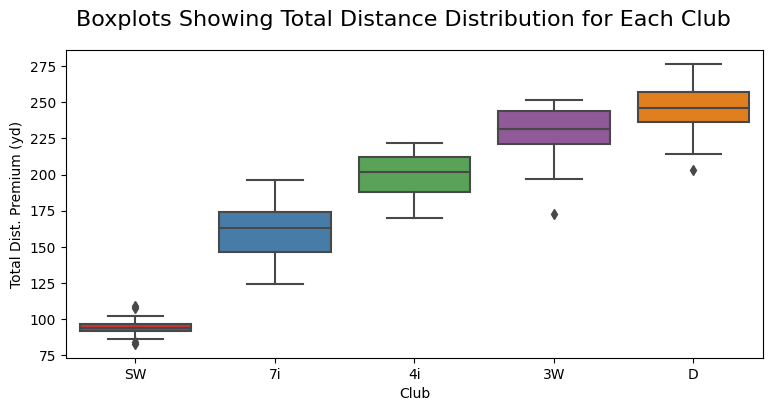

In [29]:
plt.figure(figsize=(9,4))
sns.boxplot(x='Club',y='Total Dist. Premium (yd)',data=data,palette='Set1')
plt.suptitle('Boxplots Showing Total Distance Distribution for Each Club', fontsize=16)

This was an enlightening project, which highlights some inconsistencies and suggests modifications to strategy and practice routine are in order. In particular the 7 iron and 3 wood ball speed distributions are relatively large when compared with the other clubs, suggesting that consistency of strike was less accurate with these clubs. In addition to this, the data for the driver and 3 wood suggested that any slight gains in accuracy achieved by hitting 3 wood off the tee are more than compensated for by the additional distance achieved by the driver, at least in most cases where accuracy is not critical. Finally, the data suggests I am not achieving enough additional distance with my driver over my 3 wood, which suggests I may not be accurately fitted for my driver or should consider upgrading to a newer model.

There is a lot of potential for further work on this project. More shots could be hit with each club to improve the statistics and distribution data. The analysis could also be repeated for more clubs and using improved technology, such as using a Trackman launch monitor, which provides many additional variables, such a club path, strike location on face, face angle, descent angle, ball spin rate.

These additional parameters could open up the possibility of using machine learning to calculate optimal parameters for both distance and accuracy.